![SegmentLocal](../../assets/images/Logo2.png)

# Day 1: Data Vizualization

### Prerequisites

For this chapter, you should be familiar with the following:

- Basic Python programming


## The Basic: make a bar plot with matplotlib

In [2]:
import matplotlib.pyplot as plt
import numpy as np

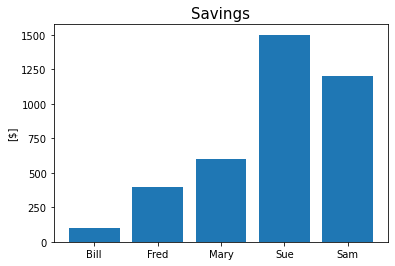

In [17]:
# define the number of x-coordinates
x = np.arange(5)

# create some data
money = [100, 400, 600, 1500, 1200]
owner = ['Bill', 'Fred', 'Mary', 'Sue', 'Sam']

# create a figure object with a single axes object
fig, ax = plt.subplots()

# create a bar plot of the data
ax.bar(x, money)

# set the ticks on the x-axis and label them
ax.set_xticks(x)
ax.set_xticklabels(owner)

# set the ticks on the y-axis
ax.set_yticks(np.arange(0, 1600, 250))

# add some general descriptions
ax.set_title('Savings', fontsize=15)
ax.set_ylabel('[$]')

plt.show()

### Create multiple plots

For creating a figure with multiple plots we first have to take another look on [```plt.subplots()```](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html). For single plots we simply used this command with the default values ```nrows=1``` and ```ncols=1```, which created a 1x1 subplot grid for a single plot. Which means that by specifying the number of rows and columns we can create a subplot grid for several axes objects. If we create e.g. a subplot of 2 rows and 2 columns we get 4 axes (plotting areas).

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In the section below, draw 4 plots as described below.

- $ y1 = \sin x $
- $ y2 = 2 * \sin x$
- $ y3 = \sin 2x $
- $ y4 = \sin (2x + 1) $

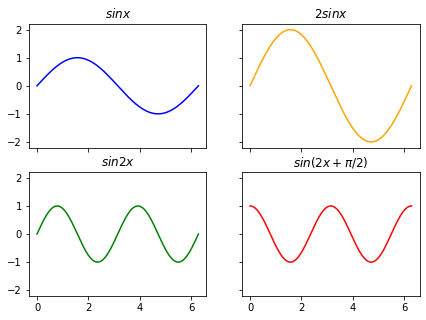

In [16]:
x = np.linspace(0, 2 * np.pi, 400)
y1 = np.sin(x)
y2 = 2 * np.sin(x)
y3 = np.sin(2*x)
y4 = np.sin(2*x + np.pi/2)

# create a figure object with 4 axes objects and a predefined size 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7,5), sharey=True, sharex=True)

axes = axes.ravel()

# create the plots for each axes object
axes[0].plot(x, y1, color='b')
axes[1].plot(x, y2, color='orange')
axes[2].plot(x, y3, color='green')
axes[3].plot(x, y4, color='red')

axes[0].set_title(r'$sin x$')
axes[1].set_title(r'$2 sin x$')
axes[2].set_title(r'$sin 2x$')
axes[3].set_title(r'$sin (2x + \pi/2)$')

plt.show()

## 2. The Advanced: Plotting with Seaborn

Now that the basics of matplotlib are clear we will concentrate on creating basic plots using real data from [github](https://github.com/mwaskom/seaborn-data). Therefore we will go through some seaborn plots that you can use for data visualization. Note that most of the plots we will use in seaborn can also be created with matplotlib. But seaborn is with its dataset-oriented plotting functions that internally perform the necessary semantic mappings way easier to handle than matplotlib, producing informative complex plots with only a few lines of code.

### 2.1 Load package imports and dataset

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [21]:
# use seaborn to load the dataset 'tips' as a pandas dataframe
tips = sns.load_dataset('tips')

In [22]:
# take a look at the head of the dataframe
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
# take a look at the tail of the dataframe
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


What is the distribution of `total_bill`?

Use [sns.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html) to plot a histogram of `total_bill`.

Plot verticle lines for the `mean` and `median` of `total_bill` on the distribution using matplotlib's [axvline](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html) function.

Make a new text cell below the figure and write down your observations.

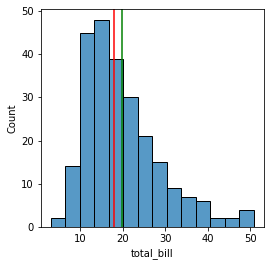

In [43]:
fig, ax = plt.subplots(figsize=(4,4))

ax = sns.histplot(data=tips, x='total_bill', ax=ax)
ax.axvline(tips.total_bill.mean(), color='green')
ax.axvline(tips.total_bill.median(), color='red');

What is the `mean` and `std` of `total_bill` for the different days?

What is the `mean` and `std` of `total_bill` for the different days as well as for the different sex?

Use Seaborn's [```barplot()```](https://seaborn.pydata.org/generated/seaborn.barplot.html) function to plot simple barplots. <br>
Some of the more important parameters that you should have in mind are:

- **hue:** Grouping variable that will produce elements with different colors. 
- **ax:** If provided, plot on this axis.

Make a new text cell below the figure and write down your observations.

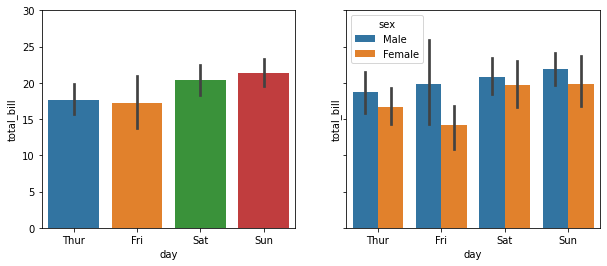

In [52]:
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)

# create barplots
sns.barplot(data=tips, x='day', y='total_bill', ax=axes[0])

sns.barplot(
    data=tips, x='day', y='total_bill', ax=axes[1],
    hue='sex', 
)
# limit y-axis from 0 to 30
axes[0].set(ylim=(0, 30))

plt.show()

What are the different quantiles of `total_bill` for the different days?

What are the different quantiles `total_bill` for the different days as well as for the different sex?

Use Seaborn's [```boxplot()```](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to show the whole distributions with respect to different categories. <br>
Some of the more important parameters that you should have in mind are:

- **hue:** Grouping variable that will produce elements with different colors.
- **ax:** If provided, plot on this axis.

Make a new text cell below the figure and write down your observations.

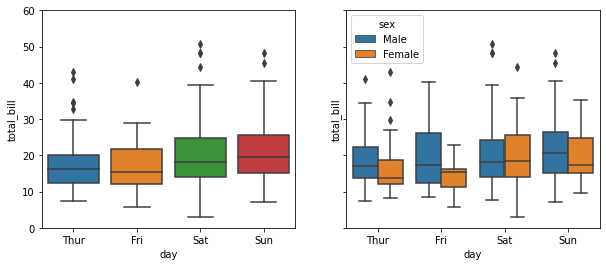

In [54]:
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4), sharey=True)

# create boxplots
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[0])
sns.boxplot(data=tips, x='day', y='total_bill', ax=axes[1], hue='sex',)

# limit y-axis from 0 to 60
axes[0].set(ylim=(0, 60))

plt.show()

What is the relationship between `tip` and `total_bill`?

What is the relationship between `tip` and `total_bill` for the different sex?

You can use Seaborn's [```scatterplot()```](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function to plot relationships between x and y showing different subsets of the data using hue, style and size. Some of the more important parameters that you should have in mind are:

- **hue:** Grouping variable that will produce elements with different colors.
- **style:** Grouping variable that will produce points with different markers.
- **size:** Grouping variable that will produce elements with different sizes. 
- **sizes:** E.g. a list of size values mapping levels of the size variable to sizes.
- **ax:** If provided, plot on this axis

Make a new text cell below the figure and write down your observations.

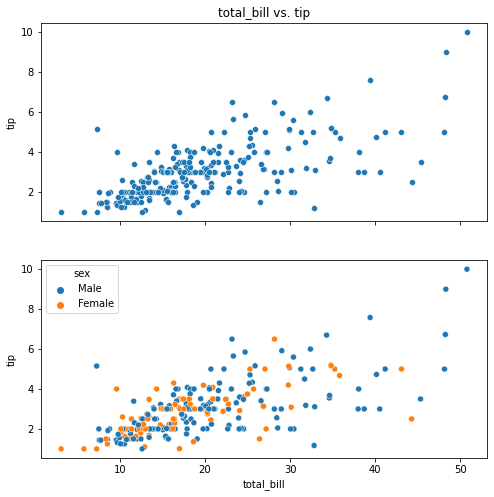

In [60]:
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8), sharey=True, sharex=True)

# create scatterplots
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0])
# depict days with a different color
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[1], hue='sex')

# add some general descriptions
axes[0].set(title='total_bill vs. tip', xlabel='total bill')

plt.show()

What is the relationship between `tip` and `total_bill` for customers who are `smoker` and for `time` of meal?

What is the relationship between `tip` and `total_bill` for `time` and `day` of meal?

Make a new text cell below the figure and write down your observations.

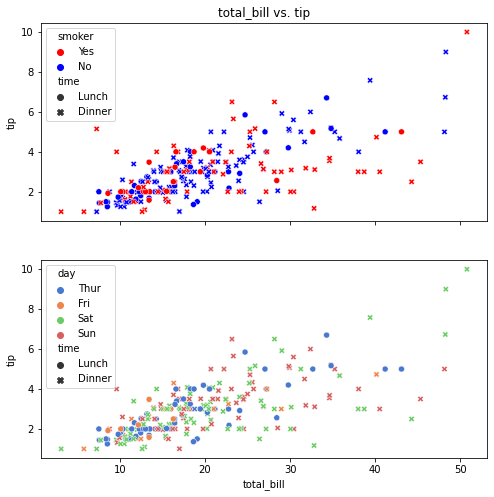

In [70]:
#create figure and axes objects of a predefined size
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8), sharey=True, sharex=True)

# create scatterplots
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[0], style='time', hue='smoker', palette=['r', 'b'])
# depict days with a different color
sns.scatterplot(data=tips, x='total_bill', y='tip', ax=axes[1], style='time', hue='day', palette='muted')

# add some general descriptions
axes[0].set(title='total_bill vs. tip', xlabel='total bill')

plt.show()

What is the relationship between `tip` and `total_bill` depending on the `size` of the group eating a meal? 

Make a new text cell below the figure and write down your observations.

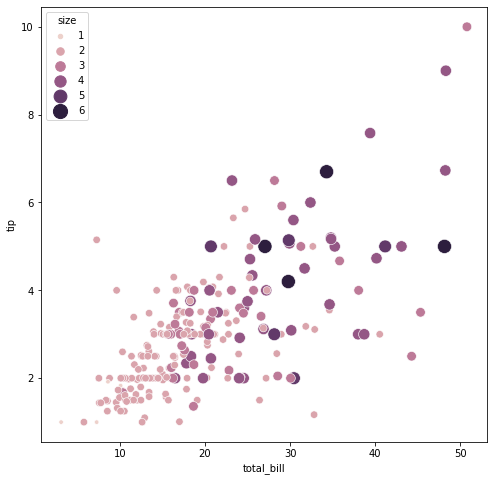

In [74]:
#create figure and axes objects of a predefined size
fig, ax = plt.subplots(figsize=(8,8))

sns.scatterplot(data=tips, x='total_bill', y='tip', ax=ax, size='size', 
                sizes=(20,200), hue='size')

plt.show()

## Bonus Exercise

For this exercise, we will work with the new dataset **'titanic'** which can be found at [github](https://github.com/mwaskom/seaborn-data). This dataset comprises information about the passengers of the titanic, including i.a. gender, age, class, fare price and survival, for which we will create some plots.

### Load dataset

In [76]:
# use seaborn to load the dataset 'titanic' as a pandas dataframe
titanic = sns.load_dataset('titanic')

# look in the column 'age' for missing values and remove these rows
titanic.dropna(subset=['age'], inplace=True)

In [77]:
# take a look at the head of the dataframe
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [78]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     714 non-null    int64   
 1   pclass       714 non-null    int64   
 2   sex          714 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        714 non-null    int64   
 5   parch        714 non-null    int64   
 6   fare         714 non-null    float64 
 7   embarked     712 non-null    object  
 8   class        714 non-null    category
 9   who          714 non-null    object  
 10  adult_male   714 non-null    bool    
 11  deck         184 non-null    category
 12  embark_town  712 non-null    object  
 13  alive        714 non-null    object  
 14  alone        714 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 70.2+ KB


This dataset yields some interesting information, but for our plots we will actually only need the following:

- **survived:** passenger survived (1), passenger did not survive (0) 
- **sex:** passenger is (male / female)
- **age:** passenger's age
- **fare:** passenger's paid fare price
- **class:** First / Second / Third class passenger
- **who:** man / woman / child
- **alone:** passenger travelling alone (True) or travelling not alone (False)

### Now ask *THREE* questions about the data and make plots to answer those questions. 

<div class="alert alert-block alert-warning">
    
    Don't forget to write down your observations! 

</div>

## Summary - What you have learned about data visualization

Congratulations, you've mastered the data visualization chapter! By now you should be familiar with creating nice plots using seaborn. Although we covered several different plots, there is still a lot to discover. Feel free to have look at the [official seaborn tutorial webpage](https://seaborn.pydata.org/tutorial.html) to discover more that will help you in creating more informative and beautiful plots. 